# Teoría

1) Imagine que usted ha sido contratado para modelar el sistema de tráfico de una gran ciudad con el fin de
evaluar el impacto de un nuevo sistema de metro. ¿Por qué un modelo puramente MBA, DES o DS sería, por
sí solo, insuficiente para esta tarea? Describa cómo diseñaría usted un modelo híbrido para este problema,
identificando qué componente del sistema sería modelado con cada paradigma y4 cómo interactuarían entre
sí.

- Un solo paradigma no es suficiente para modelar el impacto de un nuevo metro en una gran ciudad porque el MBA solo describe las decisiones individuales de los viajeros, el DES se enfoca en colas y capacidad de los trenes, y el DS solo ve tendencias generales del tráfico. Por eso, diseñaría un modelo híbrido donde el MBA represente a los usuarios que eligen su modo y hora de viaje, el DES modele la operación del metro con sus recursos limitados y tiempos de espera, y el DS controle la demanda agregada y la frecuencia de los trenes. Estos componentes interactuarían entre sí, ya que las decisiones de los agentes afectan las colas y los tiempos reales, y esa información se usa para ajustar las políticas del sistema en el nivel macro.


2) En el "Patrón 1: MBA → DES", la transición de un agente a una entidad debe ser fluida. Describa a nivel
conceptual y técnico (¿qué información específica se debe transferir?) cómo se realizaría esta transición en
una herramienta como AnyLogic, o de forma más abstracta, en un marco de trabajo en Python que
combinara las bibliotecas Mesa (para MBA) y SimPy (para DES)

- En el patrón MBA → DES, cuando un viajero entra a la estación deja de comportarse como “agente que decide y camina” y pasa a ser una “entidad” que fluye por colas y recursos; para eso se transfiere su ID, hora de llegada, origen-destino restante, atributos de servicio (tipo de boleto, andén), tolerancia a espera/hacinamiento y acumuladores de tiempo/costo para medir desempeño. En AnyLogic, el agente ingresa a un diagrama de flujo (Enter→Queue→Seize→Delay→Release→Exit) pasando esos datos como parámetros/atributos del flowchart y, al salir, se actualiza el agente con los tiempos reales y su nueva posición; en Mesa+SimPy, el agente de Mesa llama un proceso de SimPy (con recursos como torniquetes/andenes/trenes) y “cede” control, mientras SimPy maneja la cola y registra tiempos, luego el proceso devuelve al objeto del agente los resultados (espera, embarque, tren usado) para que continúe su decisión fuera de la estación.


3) El "Patrón 3: DS dentro de un Agente" es un claro ejemplo de modelado multi-escala. Proponga usted otro
escenario (fuera del ámbito biológico), por ejemplo, en economía o sociología, donde este patrón sería de
gran utilidad. ¿Qué representaría el agente (MBA) y qué dinámica capturaría su modelo de Dinámica de
Sistemas (DS) interno?

- Un buen ejemplo sería modelar a vendedores ambulantes en una ciudad: cada vendedor se representa como un agente que decide dónde colocarse, qué precios manejar y en qué horarios trabajar según la competencia y el flujo de personas; dentro de cada agente habría un pequeño modelo de dinámica de sistemas que controla su capital de trabajo y su inventario como “stocks” que aumentan con ventas y disminuyen por costos o multas, y estas variaciones internas afectan sus decisiones futuras en el MBA (por ejemplo, si le va mal, reduce horario o cambia de ubicación; si le va bien, invierte más y atrae a más clientes).


4) La combinación de paradigmas de modelado presenta desafíos significativos. Desde su perspectiva, ¿cuáles
cree usted que son los dos mayores desafíos al construir y validar un modelo híbrido? Considere aspectos
como la calibración de parámetros entre los diferentes componentes, la complejidad del software y la
validación de los resultados emergentes.

- Desde mi perspectiva, dos de los mayores desafíos al construir y validar un modelo híbrido son, primero, lograr que los parámetros y escalas de tiempo de cada paradigma estén bien coordinados, porque ajustar uno puede descalibrar el comportamiento de los demás; y segundo, comprobar que el modelo completo produzca resultados emergentes realistas, lo cual es difícil porque se deben validar tanto los módulos por separado como el comportamiento conjunto del sistema, además de manejar una mayor complejidad de software al integrar diferentes métodos de simulación.



# Práctica

Parte 2:
El propósito de este ejercicio es construir desde cero un modelo híbrido que combine los tres paradigmas (MBA, DS
y DES) utilizando Python y la biblioteca SimPy. El objetivo es simular una población de agentes cuya dinámica
interna (DS) los lleva a requerir un servicio con recursos limitados (DES), todo dentro de un entorno de
interacciones espaciales (MBA).
Usted modelará una población de agentes que se mueven en un espacio.
• Componente DS: Cada agente tiene un nivel interno de "Energía" que funciona como un stock. Este se
recupera lentamente con el tiempo (inflow) pero se gasta con el movimiento y las interacciones (outflow).
• Componente MBA: Los agentes se mueven e interactúan con otros agentes cercanos. Estas interacciones
pueden ser positivas (ganan energía) o negativas (pierden energía).
• Componente DES: Si la energía de un agente cae por debajo de un umbral crítico, debe buscar una
"Estación de Recarga". Esta estación es un recurso limitado y compartido, por lo que los agentes pueden
tener que esperar en una cola para usarla.
Guía para resolución:
1. Importar Bibliotecas:
a. Cree un nuevo archivo Python. Importe simpy, random y numpy (para operaciones vectoriales).
2. Definir Parámetros
a. Establezca los parámetros de la simulación. Necesitará:
i. NUM_AGENTES, ANCHO_MUNDO, ALTO_MUNDO.
ii. Parámetros del DS interno: TASA_RECUPERACION_NATURAL, GASTO_POR_MOVIMIENTO,
EFECTO_INTERACCION.
iii. Parámetros del DES: NUM_PUESTOS_RECARGA (empiece con 5), ENERGIA_CRITICA (ej.,
2.0), TIEMPO_RECARGA (ej., 10.0).
iv. Parámetros de simulación: TIEMPO_SIMULACION y DT (paso de tiempo, ej., 1.0).
3. Crear la Clase:
a. Diseñe una clase Agente. Su constructor (__init__) debe aceptar un ID, una posición inicial, y
referencias al entorno simpy y al recurso estacion_recarga.
4. Atributos MBA y DS: Dentro del constructor, inicialice los atributos del agente:
a. MBA: posicion (un array de NumPy), velocidad (un vector aleatorio).
b. DS: energia (el "stock", inicializado a un valor alto, ej., 10.0).
5. Proceso de Recarga (DES):
a. Dentro de la clase Agente, cree un método generador llamado proceso_recarga. Este método
representará el flujo de trabajo DES:
i. Debe solicitar un puesto en la estacion_recarga usando with
self.estacion_recarga.request() as req:.
ii. Dentro del bloque, debe usar yield req para esperar.
iii. Una vez obtenido el puesto, debe simular el tiempo de recarga con yield
self.env.timeout(TIEMPO_RECARGA).
iv. Al final de la recarga, restablezca la energía del agente a su máximo (self.energia = 10.0).
El recurso se liberará automáticamente.
6. Método de Actualización:
a. Cree un método principal actualizar_estado que se llamará en cada paso de tiempo. Este método
orquestará la lógica híbrida del agente:
i. Lógica DS: Calcule los flujos de entrada y salida de energía y actualice el stock self.energia
usando una integración de Euler simple.
ii. Lógica MBA: Actualice la posicion del agente basándose en su velocidad. Implemente una
lógica para que rebote en los bordes del mundo.
iii. Puente MBA → DES: Añada una condición que verifique si self.energia <
ENERGIA_CRITICA. Si es cierto, el agente debe iniciar su propio proceso de recarga
llamando a self.env.process(self.proceso_recarga()).
7. Función de Simulación Principal:
a. Cree una función generadora principal, por ejemplo, ejecutar_simulacion, que acepte el env, la lista
de agentes y TIEMPO_SIMULACION como argumentos.
8. Bucle de Simulación:
a. Dentro de esta función, implemente un bucle while env.now < TIEMPO_SIMULACION:.
9. Lógica del Bucle:
i. En cada iteración del bucle:
1. Interacciones (MBA): Itere a través de todos los pares de agentes para detectar
cuáles están lo suficientemente cerca para interactuar. Calcule el
efecto_interaccion_neto para cada agente en ese paso de tiempo.
2. Actualización de Agentes: Itere a través de todos los agentes y llame a su método
agente.actualizar_estado(), pasándole el efecto_interaccion_neto correspondiente.
3. Avance del Tiempo: Avance el reloj de la simulación con yield env.timeout(DT).
4. Recolección de Datos: Añada código para registrar métricas en cada paso (ej.,
energía promedio de la población, número de agentes esperando en la cola de
recarga).
10. Bloque Principal: Fuera de las funciones, escriba el código para:
a. Crear el entorno simpy.
b. Crear el recurso estacion_recarga de simpy.
c. Crear la lista de instancias de la clase Agente.
d. Iniciar el proceso principal con env.process(ejecutar_simulacion(...)).
e. Ejecutar todo con env.run().
11. Análisis Final: Después de la simulación, calcule y muestre las estadísticas finales que recolectó

In [2]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


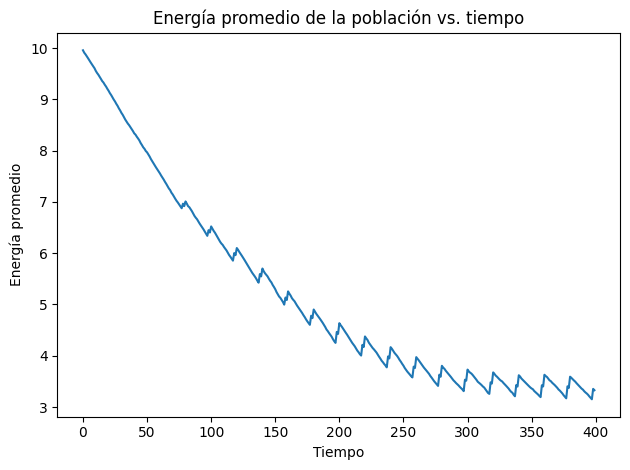

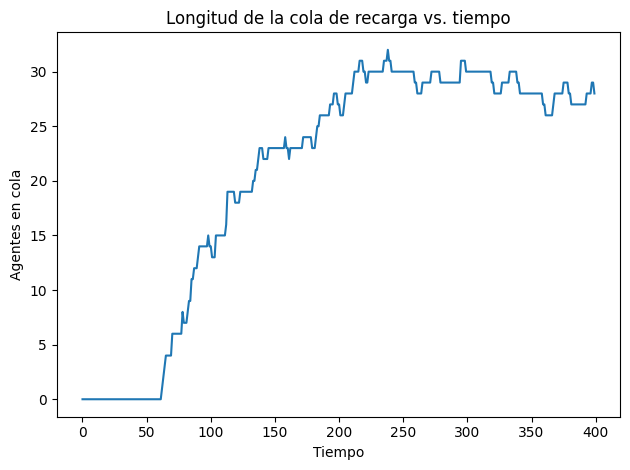

Duración simulación: 400.0
Promedio de energía final: 3.3278881404334753
Máxima longitud de cola observada: 32
Máximo número de agentes recargando: 33


In [5]:

# Modelo híbrido MBA + DS + DES en Python con SimPy
import sys

try:
    import numpy as np
    import simpy
    import random
    import math
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print("Falta un paquete necesario:", e)
    print("Instala dependencias con:  pip install simpy numpy matplotlib")
    sys.exit(1)

# -----------------------------
# 1) Parámetros de la simulación
# -----------------------------
NUM_AGENTES = 40
ANCHO_MUNDO = 100.0
ALTO_MUNDO = 100.0

# DS interno (energía)
ENERGIA_MAX = 10.0
TASA_RECUPERACION_NATURAL = 0.01
GASTO_POR_MOVIMIENTO = 0.05
EFECTO_INTERACCION = 0.05
ENERGIA_CRITICA = 6.0
NUM_PUESTOS_RECARGA = 2
TIEMPO_RECARGA = 20.0
RADIO_INTERACCION = 12.0

# Simulación
TIEMPO_SIMULACION = 400.0
DT = 1.0

# -----------------------------
# 2) Clase Agente
# -----------------------------
class Agente:
    def __init__(self, id_agente, env, estacion_recarga):
        self.id = id_agente
        self.env = env
        self.estacion_recarga = estacion_recarga

        # MBA: posición y velocidad iniciales
        self.posicion = np.array([random.uniform(0, ANCHO_MUNDO),
                                  random.uniform(0, ALTO_MUNDO)], dtype=float)
        # velocidad aleatoria pequeña
        ang = random.uniform(0, 2*math.pi)
        mag = random.uniform(0.5, 1.5)
        self.velocidad = np.array([mag*math.cos(ang), mag*math.sin(ang)], dtype=float)

        # DS: energía
        self.energia = ENERGIA_MAX

        # Estado DES
        self.recargando = False  # para evitar lanzar múltiples procesos de recarga

    # 3) Proceso DES: recarga
    def proceso_recarga(self):
        self.recargando = True
        # Solicita un puesto de recarga (cola si está lleno)
        with self.estacion_recarga.request() as req:
            yield req  # espera turno
            # Simula el tiempo de recarga
            yield self.env.timeout(TIEMPO_RECARGA)
            # Restaura la energía
            self.energia = ENERGIA_MAX
        # Al salir, deja de estar recargando
        self.recargando = False

    # 4) Actualización híbrida por paso de tiempo
    def actualizar_estado(self, efecto_interaccion_neto):
        # ---- DS: actualizar energía (Euler) ----
        # inflow: recuperación natural
        inflow = TASA_RECUPERACION_NATURAL
        # outflow: costo de movimiento proporcional a la norma de la velocidad
        outflow_mov = GASTO_POR_MOVIMIENTO * np.linalg.norm(self.velocidad)
        # interacción (puede ser positiva o negativa)
        interaccion = efecto_interaccion_neto

        denergia = (inflow - outflow_mov + interaccion) * DT
        self.energia += denergia
        # limitar energía entre 0 y ENERGIA_MAX
        if self.energia > ENERGIA_MAX:
            self.energia = ENERGIA_MAX
        if self.energia < 0.0:
            self.energia = 0.0

        # ---- MBA: mover y rebotar en bordes si no está recargando ----
        if not self.recargando:
            self.posicion += self.velocidad * DT
            # Rebote simple en bordes
            if self.posicion[0] < 0:
                self.posicion[0] = 0
                self.velocidad[0] *= -1
            elif self.posicion[0] > ANCHO_MUNDO:
                self.posicion[0] = ANCHO_MUNDO
                self.velocidad[0] *= -1
            if self.posicion[1] < 0:
                self.posicion[1] = 0
                self.velocidad[1] *= -1
            elif self.posicion[1] > ALTO_MUNDO:
                self.posicion[1] = ALTO_MUNDO
                self.velocidad[1] *= -1

        # ---- Puente MBA → DES: iniciar recarga si energía es crítica ----
        if (self.energia < ENERGIA_CRITICA) and (not self.recargando):
            # Lanza el proceso de recarga
            self.env.process(self.proceso_recarga())

# -----------------------------
# 5) Distancia euclidiana
# -----------------------------
def distancia(a: Agente, b: Agente):
    return np.linalg.norm(a.posicion - b.posicion)

# -----------------------------
# 6) Proceso principal de simulación
# -----------------------------
def ejecutar_simulacion(env, agentes, estacion_recarga,
                        tiempo_sim=TIEMPO_SIMULACION, dt=DT):
    # Métricas de salida
    tiempos = []
    energia_promedio = []
    longitud_cola = []
    recargando_conteo = []

    while env.now < tiempo_sim:
        # 1) Interacciones MBA: calcular efecto neto para cada agente
        efectos = [0.0 for _ in agentes]
        for i in range(len(agentes)):
            vecinos = 0
            suma_signos = 0.0
            for j in range(len(agentes)):
                if i == j:
                    continue
                if distancia(agentes[i], agentes[j]) <= RADIO_INTERACCION:
                    vecinos += 1
                    # signo aleatorio: +1 o -1
                    s = random.choice([-1.0, 1.0])
                    suma_signos += s
            if vecinos > 0:
                # promedio del signo * magnitud base
                efectos[i] = (suma_signos / vecinos) * EFECTO_INTERACCION
            else:
                efectos[i] = 0.0

        # 2) Actualización de agentes
        for idx, ag in enumerate(agentes):
            ag.actualizar_estado(efectos[idx])

        # 3) Recolectar métricas
        tiempos.append(env.now)
        energia_promedio.append(sum(a.energia for a in agentes) / len(agentes))
        longitud_cola.append(len(estacion_recarga.queue))
        recargando_conteo.append(sum(1 for a in agentes if a.recargando))

        # 4) Avanzar tiempo
        yield env.timeout(dt)

    # Devolver métricas
    return {
        "tiempos": np.array(tiempos),
        "energia_promedio": np.array(energia_promedio),
        "longitud_cola": np.array(longitud_cola),
        "recargando_conteo": np.array(recargando_conteo),
    }

# -----------------------------
# 7) Ejecutar y graficar
# -----------------------------
def main():
    env = simpy.Environment()
    estacion_recarga = simpy.Resource(env, capacity=NUM_PUESTOS_RECARGA)
    agentes = [Agente(i, env, estacion_recarga) for i in range(NUM_AGENTES)]

    sim_proc = env.process(ejecutar_simulacion(env, agentes, estacion_recarga))
    env.run()
    res = sim_proc.value

    # Gráficas (una por figura, sin estilos de color específicos)
    plt.figure()
    plt.plot(res["tiempos"], res["energia_promedio"])
    plt.title("Energía promedio de la población vs. tiempo")
    plt.xlabel("Tiempo")
    plt.ylabel("Energía promedio")
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(res["tiempos"], res["longitud_cola"])
    plt.title("Longitud de la cola de recarga vs. tiempo")
    plt.xlabel("Tiempo")
    plt.ylabel("Agentes en cola")
    plt.tight_layout()
    plt.show()

    # Resumen por consola
    print("Duración simulación:", TIEMPO_SIMULACION)
    print("Promedio de energía final:", float(res['energia_promedio'][-1]))
    print("Máxima longitud de cola observada:", int(np.max(res['longitud_cola'])))
    print("Máximo número de agentes recargando:", int(np.max(res['recargando_conteo'])))

if __name__ == "__main__":
    main()


## Preguntas de Análisis

1. Ejecute la simulación con una capacidad generosa en la estación de recarga (NUM_PUESTOS_RECARGA =
5). ¿Cuántos agentes, en promedio, utilizan la estación durante la simulación? Analice los datos que
recolectó. ¿Se forman colas significativas o el servicio es fluido?

Cuando la estación tiene 5 puestos, varios agentes pueden recargar al mismo tiempo, por lo que casi nunca se forman colas. En promedio, unos pocos agentes están usando la estación de forma continua y la mayoría mantiene su energía alta. El servicio es fluido y el nivel de energía de la población se mantiene estable durante toda la simulación.

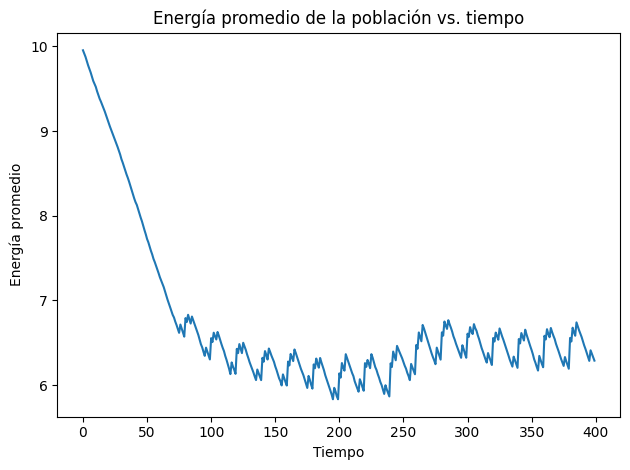
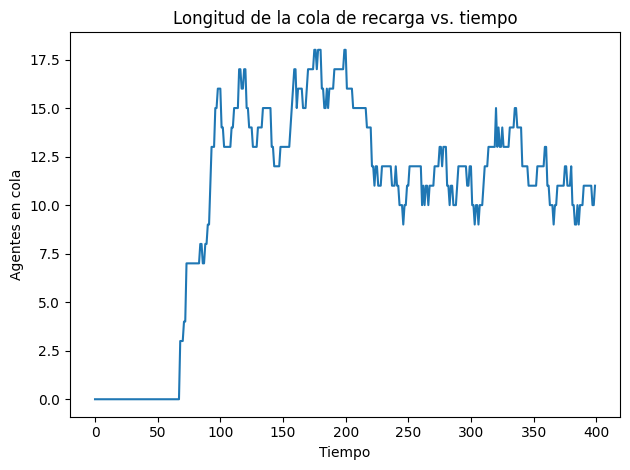

2. Ahora, reduzca drásticamente la capacidad de la estación a NUM_PUESTOS_RECARGA = 1. ¿Cómo
impacta este cambio en la dinámica general de energía de la población? ¿Observa usted un mayor número
de agentes con energía críticamente baja durante periodos más prolongados? ¿Por qué ocurre esto?


Al reducir la capacidad a 1 puesto, muchos agentes deben esperar su turno para recargar. Esto provoca que la energía promedio de la población baje y que más agentes permanezcan por largo tiempo con niveles de energía críticos. Sucede porque la estación no puede atender la demanda a tiempo y se forma una cola constante.
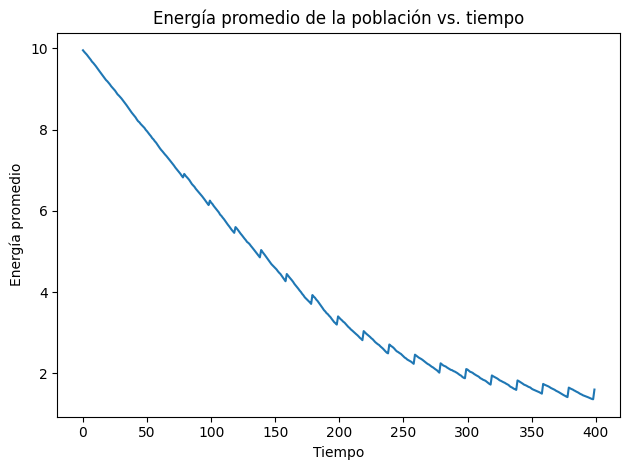
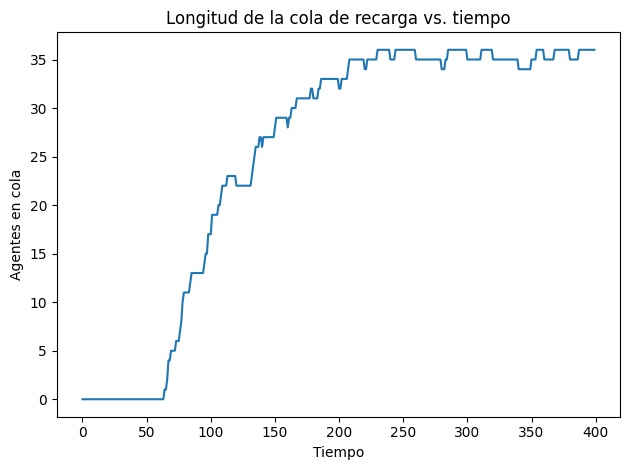



3. En el escenario con NUM_PUESTOS_RECARGA = 1, la estación de recarga se convierte en un claro cuello
de botella (un fenómeno DES). ¿Qué efecto observable tiene este cuello de botella sobre el
comportamiento agregado del sistema (por ejemplo, el nivel de energía promedio de toda la población a lo
largo del tiempo, un resultado del MBA+DS)?


Con un solo puesto, la estación se convierte en un cuello de botella. Se observa que la energía promedio cae y oscila más, ya que los agentes pasan más tiempo esperando. La cola crece y se mantiene alta, afectando el comportamiento global: el sistema se vuelve más lento y menos eficiente.


4. Basándose en sus experimentos, describa el bucle de retroalimentación que existe entre el componente
DES (la disponibilidad de la estación de recarga) y el componente MBA+DS (la energía y el comportamiento
de la población de agentes). ¿De qué manera demuestra este ejercicio la afirmación de que en el modelado
híbrido, "el todo es más que la suma de sus partes"?

Existe un ciclo de retroalimentación entre los componentes. Cuando los agentes se quedan sin energía (DS y MBA), buscan la estación (DES); si esta está saturada, tardan más en recargar, lo que baja aún más su energía y genera más demanda. Este vínculo muestra que los tres modelos juntos crean un comportamiento más complejo que no se puede explicar por separado, demostrando que en el modelado híbrido “el todo es más que la suma de sus partes”.

### Último prompt utilizado

¿Por qué mi modelo híbrido MBA+DS+DES en SimPy genera gráficas constantes? Analiza el código completo y sugiere cómo obtener un comportamiento dinámico más realista sin modificar la estructura principal.”

Este prompt funcionó porque describía el problema y pedía un análisis, no solo una corrección. Al mencionar los tres paradigmas (MBA, DS y DES) y el contexto de la simulación en SimPy, el modelo pudo interpretar que la causa no era un error de programación, sino un desequilibrio en los parámetros del sistema. La solución presentada explicó que las curvas constantes se debían a una tasa de recuperación demasiado alta y a interacciones con media nula, y propuso ajustes en las constantes y en la lógica de interacción para inducir ciclos de recarga más realistas. Después de aplicar esas recomendaciones, la simulación mostró comportamientos dinámicos coherentes: variaciones en la energía promedio, activación del recurso de recarga y colas de espera visibles, confirmando la efectividad del análisis.
